# 10分でpandasからKoalasに移行

## pandasからKoalasへの移行

### オブジェクトの作成

In [0]:
import numpy as np
import pandas as pd
import databricks.koalas as ks

In [0]:
# pandasのシリーズの作成
pser = pd.Series([1, 3, 5, np.nan, 6, 8]) 
# Koalasのシリーズの作成
kser = ks.Series([1, 3, 5, np.nan, 6, 8])
# pansasシリーズを渡してKoalasシリーズを作成
kser = ks.Series(pser)
kser = ks.from_pandas(pser)

In [0]:
pser

Out[3]: 0 1.0
1 3.0
2 5.0
3 NaN
4 6.0
5 8.0
dtype: float64

In [0]:
kser

Out[4]: 1 3.0
4 6.0
0 1.0
2 5.0
3 NaN
5 8.0
dtype: float64

In [0]:
kser.sort_index()

Out[5]: 0 1.0
1 3.0
2 5.0
3 NaN
4 6.0
5 8.0
dtype: float64

In [0]:
# pandasデータフレームの作成
pdf = pd.DataFrame({'A': np.random.rand(5),
                    'B': np.random.rand(5)})
# Koalasデータフレームの作成
kdf = ks.DataFrame({'A': np.random.rand(5),
                    'B': np.random.rand(5)})
# pandasデータフレームを渡してKoalasデータフレームを作成
kdf = ks.DataFrame(pdf)
kdf = ks.from_pandas(pdf)

In [0]:
pdf

Out[7]:

,A,B
0,0.969608,0.798702
1,0.504278,0.499273
2,0.463493,0.430988
3,0.488868,0.090766
4,0.706364,0.564259


In [0]:
kdf.sort_index()

Out[8]:

,A,B
0,0.969608,0.798702
1,0.504278,0.499273
2,0.463493,0.430988
3,0.488868,0.090766
4,0.706364,0.564259


### データの参照

In [0]:
kdf.head(2)

Out[9]:

,A,B
0,0.969608,0.798702
1,0.504278,0.499273


In [0]:
kdf.describe()

Out[10]:

,A,B
count,5.000000,5.000000
mean,0.626522,0.476798
std,0.214798,0.256367
min,0.463493,0.090766
25%,0.488868,0.430988
50%,0.504278,0.499273
75%,0.706364,0.564259
max,0.969608,0.798702


In [0]:
kdf.sort_values(by='B')

Out[11]:

,A,B
3,0.488868,0.090766
2,0.463493,0.430988
1,0.504278,0.499273
4,0.706364,0.564259
0,0.969608,0.798702


In [0]:
kdf.transpose()

Out[12]:

,0,1,4,2,3
A,0.969608,0.504278,0.706364,0.463493,0.488868
B,0.798702,0.499273,0.564259,0.430988,0.090766


### オプションの設定

[Options and settings — Koalas 1\.7\.0 documentation](https://koalas.readthedocs.io/en/latest/user_guide/options.html)

**compute.max_rows**
> `compute.max_rows`は現在のKoalasデータフレームのリミットを設定します。Noneに設定した場合、入力長に制限を設けません。リミットが設定されている場合は、データをドライバーノードに集め、pandas APIを使用するショートカットの処理を行います。リミットが設定されていない場合には、PySparkによって処理が行われます。デフォルトは1000です。

In [0]:
from databricks.koalas.config import set_option, get_option
ks.get_option('compute.max_rows')

Out[13]: 1000

In [0]:
ks.set_option('compute.max_rows', 2000)
ks.get_option('compute.max_rows')

Out[14]: 2000

### 列の選択

In [0]:
kdf['A']  # あるいは kdf.A

Out[15]: 0 0.969608
1 0.504278
4 0.706364
2 0.463493
3 0.488868
Name: A, dtype: float64

In [0]:
kdf[['A', 'B']]

Out[16]:

,A,B
2,0.463493,0.430988
3,0.488868,0.090766
0,0.969608,0.798702
1,0.504278,0.499273
4,0.706364,0.564259


In [0]:
kdf.loc[1:2]

Out[17]:

,A,B
2,0.463493,0.430988
1,0.504278,0.499273


In [0]:
kdf.iloc[:3, 1:2]

Out[18]:

,B
0,0.798702
1,0.499273
2,0.430988


以下の`kdf['C'] = kser`の行はエラーとなります。これは、Koalasが、コストの高いJOIN操作を伴う列の追加(異なるデータフレームやシリーズをKoalasのデータフレームに追加)を禁じているためです。設定の`compute.ops_on_diff_frames`を`True`にすることで、この操作を有効化できます。

詳細を知りたい場合には、こちらの[ブログ記事](https://databricks.com/blog/2020/03/31/10-minutes-from-pandas-to-koalas-on-apache-spark.html)を参照ください。

In [0]:
kser = ks.Series([100, 200, 300, 400, 500], index=[0, 1, 2, 3, 4])
#kdf['C'] = kser # エラーになります

In [0]:
# Those are needed for managing options
from databricks.koalas.config import set_option, reset_option
set_option("compute.ops_on_diff_frames", True)
kdf['C'] = kser
# Reset to default to avoid potential expensive operation in the future
reset_option("compute.ops_on_diff_frames")
kdf

Out[20]:

,A,B,C
0,0.969608,0.798702,100
1,0.504278,0.499273,200
2,0.463493,0.430988,300
3,0.488868,0.090766,400
4,0.706364,0.564259,500


### KoalasオブジェクトへのPython関数の適用

In [0]:
kdf.apply(np.cumsum)

Out[21]:

,A,B,C
2,1.937380,1.728963,600
3,2.426248,1.819729,1000
0,0.969608,0.798702,100
1,1.473887,1.297975,300
4,3.132612,2.383988,1500


In [0]:
kdf.apply(np.cumsum, axis=1)

Out[22]:

,A,B,C
0,0.969608,1.768310,101.768310
1,0.504278,1.003551,201.003551
4,0.706364,1.270622,501.270622
2,0.463493,0.894481,300.894481
3,0.488868,0.579635,400.579635


In [0]:
kdf.apply(lambda x: x ** 2)

Out[23]:

,A,B,C
2,0.214826,0.185751,90000
3,0.238992,0.008239,160000
0,0.940140,0.637925,10000
1,0.254297,0.249273,40000
4,0.498949,0.318388,250000


In [0]:
def square(x) -> ks.Series[np.float64]:
    return x ** 2

In [0]:
kdf.apply(square)

Out[25]:

,A,B,C
0,0.940140,0.637925,10000.0
1,0.254297,0.249273,40000.0
2,0.214826,0.185751,90000.0
3,0.238992,0.008239,160000.0
4,0.498949,0.318388,250000.0


[Options and settings — Koalas 1\.7\.0 documentation](https://koalas.readthedocs.io/en/latest/user_guide/options.html#available-options)

**compute.shortcut_limit**
> `compute.shortcut_limit`はショートカットのリミットを設定します。指定された行数とスキーマを用いて計算を行います。データフレームの長さがこのリミットより大きい場合、PySparkを使用して計算を行います。

In [0]:
# データサイズが compute.shortcut_limit (1000) 以下なので正しく動作します
ks.DataFrame({'A': range(1000)}).apply(lambda col: col.max())

Out[26]: A 999
dtype: int64

In [0]:
# データサイズが compute.shortcut_limit (1000) より大きいため正しく動作しません
ks.DataFrame({'A': range(1001)}).apply(lambda col: col.max())

Out[27]: A 124
A 374
A 624
A 874
A 249
A 499
A 749
A 1000
dtype: int64

In [0]:
# compute.shortcut_limit を変更します
ks.set_option('compute.shortcut_limit', 1001)
ks.DataFrame({'A': range(1001)}).apply(lambda col: col.max())

Out[28]: A 1000
dtype: int64

### データのグルーピング

In [0]:
# A列でのグルーピング
kdf.groupby('A').sum()

Out[29]:

,B,C
A,,
0.488868,0.090766,400
0.463493,0.430988,300
0.706364,0.564259,500
0.969608,0.798702,100
0.504278,0.499273,200


In [0]:
# A、B列でのグルーピング
kdf.groupby(['A', 'B']).sum()

Out[30]:

,,C
A,B,
0.463493,0.430988,300
0.504278,0.499273,200
0.488868,0.090766,400
0.706364,0.564259,500
0.969608,0.798702,100


### データのプロット

In [0]:
# ノートブック上でプロットするためにインラインの設定が必要です
%matplotlib inline

Out[32]:

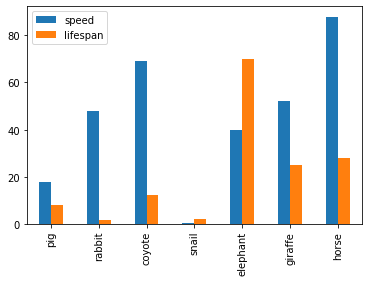

<matplotlib.axes._subplots.AxesSubplot at 0x7fd37655ce80>

In [0]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
kdf = ks.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
kdf.plot.bar()

Out[33]:

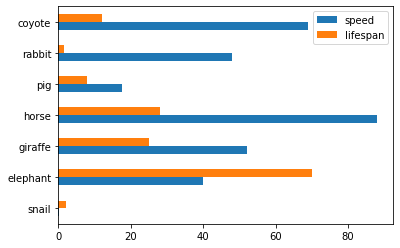

<matplotlib.axes._subplots.AxesSubplot at 0x7fd3757d0eb0>

In [0]:
kdf.plot.barh()

Out[34]:

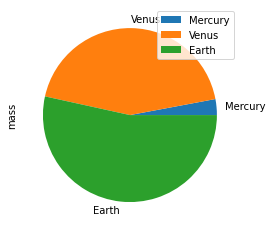

<matplotlib.axes._subplots.AxesSubplot at 0x7fd375790fd0>

In [0]:
kdf = ks.DataFrame({'mass': [0.330, 4.87, 5.97],
                    'radius': [2439.7, 6051.8, 6378.1]},
                   index=['Mercury', 'Venus', 'Earth'])
kdf.plot.pie(y='mass')

Out[35]:

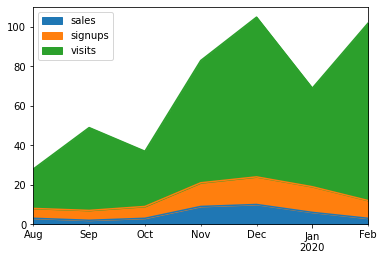

<matplotlib.axes._subplots.AxesSubplot at 0x7fd390f2b370>

In [0]:
kdf = ks.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6, 3],
    'signups': [5, 5, 6, 12, 14, 13, 9],
    'visits': [20, 42, 28, 62, 81, 50, 90],
}, index=pd.date_range(start='2019/08/15', end='2020/03/09',
                       freq='M'))
kdf.plot.area()

Out[36]:

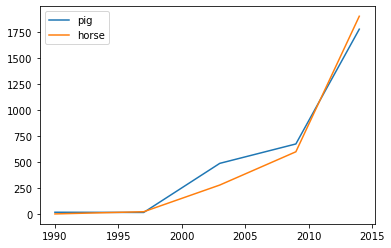

<matplotlib.axes._subplots.AxesSubplot at 0x7fd3756f1f40>

In [0]:
kdf = ks.DataFrame({'pig': [20, 18, 489, 675, 1776],
                    'horse': [4, 25, 281, 600, 1900]},
                   index=[1990, 1997, 2003, 2009, 2014])
kdf.plot.line()

Out[37]:

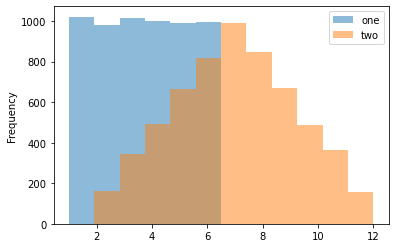

<matplotlib.axes._subplots.AxesSubplot at 0x7fd3757905b0>

In [0]:
kdf = pd.DataFrame(
    np.random.randint(1, 7, 6000),
    columns=['one'])
kdf['two'] = kdf['one'] + np.random.randint(1, 7, 6000)
kdf = ks.from_pandas(kdf)
kdf.plot.hist(bins=12, alpha=0.5)

Out[38]:

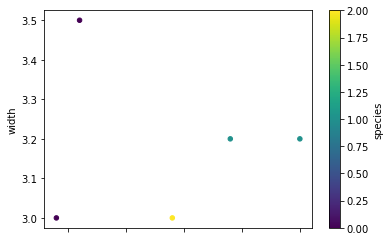

<matplotlib.axes._subplots.AxesSubplot at 0x7fd3756f1550>

In [0]:
kdf = ks.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                    [6.4, 3.2, 1], [5.9, 3.0, 2]],
                   columns=['length', 'width', 'species'])
kdf.plot.scatter(x='length',
                 y='width',
                 c='species',
                 colormap='viridis')

## Koalasに無い機能、及びワークアラウンド

### pandasオブジェクトのネイティブサポート

`ks.Timestamp()`などはまだ実装されていないため、pandasのものを利用する必要があります。

In [0]:
kdf = ks.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'F': 'foo'})

In [0]:
kdf

Out[43]:

,A,B,C,D,F
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


### pandas関数の分散実行

`DataFrame.between_time()`はKoalasでは未実装です。シンプルなワークアラウンドは`to_pandas()`を用いてpandasデータフレームに変換し、関数を適用するというものです。

In [0]:
i = pd.date_range('2018-04-09', periods=2000, freq='1D1min')
ts = ks.DataFrame({'A': ['timestamp']}, index=i)
#ts.between_time('0:15', '0:16') # エラーとなります

In [0]:
ts.to_pandas().between_time('0:15', '0:16')

Out[48]:

,A
2018-04-24 00:15:00,timestamp
2018-04-25 00:16:00,timestamp
2022-04-04 00:15:00,timestamp
2022-04-05 00:16:00,timestamp


In [0]:
ts.map_in_pandas(func=lambda pdf: pdf.between_time('0:15', '0:16'))

/databricks/python/lib/python3.8/site-packages/databricks/koalas/frame.py:2279: FutureWarning: DataFrame.map_in_pandas is deprecated as of DataFrame.koalas.apply_batch. Please use the API instead.
 warnings.warn(
Out[49]:

,A
2018-04-24 00:15:00,timestamp
2018-04-25 00:16:00,timestamp
2022-04-04 00:15:00,timestamp
2022-04-05 00:16:00,timestamp


### KoalasでのSQLの使用

`ks.sql`を用いてSQLを発行することができます。

In [0]:
kdf = ks.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'pig': [20, 18, 489, 675, 1776],
                    'horse': [4, 25, 281, 600, 1900]})

In [0]:
ks.sql("SELECT * FROM {kdf} WHERE pig > 100")

Out[51]:

,year,pig,horse
0,2003,489,281
1,2009,675,600
2,2014,1776,1900


In [0]:
pdf = pd.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'sheep': [22, 50, 121, 445, 791],
                    'chicken': [250, 326, 589, 1241, 2118]})

In [0]:
ks.sql('''
    SELECT ks.pig, pd.chicken
    FROM {kdf} ks INNER JOIN {pdf} pd
    ON ks.year = pd.year
    ORDER BY ks.pig, pd.chicken''')

Out[53]:

,pig,chicken
0,18,326
1,20,250
2,489,589
3,675,1241
4,1776,2118


## PySparkとの連携

### PySpark DataFrameとの変換

In [0]:
kdf = ks.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})
sdf = kdf.to_spark()
type(sdf)

Out[54]: pyspark.sql.dataframe.DataFrame

In [0]:
sdf.show()

+---+---+
 A| B|
+---+---+
 1| 10|
 2| 20|
 3| 30|
 4| 40|
 5| 50|
+---+---+

In [0]:
from databricks.koalas import option_context
with option_context(
        "compute.default_index_type", "distributed-sequence"):
    kdf = sdf.to_koalas()
type(kdf)

Out[56]: databricks.koalas.frame.DataFrame

In [0]:
kdf

Out[57]:

,A,B
2,3,30
3,4,40
4,5,50
0,1,10
1,2,20


In [0]:
sdf.to_koalas(index_col='A')

Out[58]:

,B
A,
3,30
4,40
1,10
2,20
5,50


### Spark実行計画の確認

In [0]:
from databricks.koalas import option_context

with option_context(
        "compute.ops_on_diff_frames", True,
        "compute.default_index_type", 'distributed'):
    df = ks.range(10) + ks.range(10)
    df.explain()

/databricks/python/lib/python3.8/site-packages/databricks/koalas/frame.py:10411: FutureWarning: DataFrame.explain is deprecated as of DataFrame.spark.explain. Please use the API instead.
 warnings.warn(
== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- Project [coalesce(__this___index_level_0__#5074L, __that___index_level_0__#5086L) AS __index_level_0__#5095L, (__this_id#5075L + __that_id#5087L) AS id#5126L]
 +- SortMergeJoin [__this___index_level_0__#5074L], [__that___index_level_0__#5086L], FullOuter
 :- Sort [__this___index_level_0__#5074L ASC NULLS FIRST], false, 0
 : +- Exchange hashpartitioning(__this___index_level_0__#5074L, 200), ENSURE_REQUIREMENTS, [id=#5973]
 : +- Project [__index_level_0__#5051L AS __this___index_level_0__#5074L, id#5049L AS __this_id#5075L]
 : +- Project [monotonically_increasing_id() AS __index_level_0__#5051L, id#5049L]
 : +- Range (0, 10, step=1, splits=8)
 +- Sort [__that___index_level_0__#5086L ASC NULLS FIRST], false, 0
 +- Exchange hashpartitioning(__that___index_level_0__#5086L, 200), ENSURE_REQUIREMENTS, [id=#5974]
 +- Project [__index_level_0__#5061L AS __that___index_level_0__#5086L, id#5059L AS __that_id#5087L]
 +- Project [monotonically_increasing_id() AS __index_level_0__#5061L, id#5059L]
 +- Range (0, 10, step=1, splits=8)

In [0]:
with option_context(
        "compute.ops_on_diff_frames", False,
        "compute.default_index_type", 'distributed'):
    df = ks.range(10)
    df = df + df
    df.explain()

== Physical Plan ==
*(1) Project [__index_level_0__#5137L, (id#5135L + id#5135L) AS id#5148L]
+- *(1) Project [monotonically_increasing_id() AS __index_level_0__#5137L, id#5135L]
 +- *(1) Range (0, 10, step=1, splits=8)

### データフレームのキャッシュ

In [0]:
with option_context("compute.default_index_type", 'distributed'):
    df = ks.range(10)
    new_df = (df + df).cache()  # `(df + df)` は `df` としてキャッシュされます
    new_df.explain()

/databricks/python/lib/python3.8/site-packages/databricks/koalas/frame.py:4264: FutureWarning: DataFrame.cache is deprecated as of DataFrame.spark.cache. Please use the API instead.
 warnings.warn(
== Physical Plan ==
*(1) ColumnarToRow
+- InMemoryTableScan [__index_level_0__#5154L, id#5165L]
 +- InMemoryRelation [__index_level_0__#5154L, id#5165L, __natural_order__#5157L], StorageLevel(disk, memory, deserialized, 1 replicas)
 +- *(1) Project [__index_level_0__#5154L, (id#5152L + id#5152L) AS id#5165L, __natural_order__#5157L]
 +- *(1) Project [__index_level_0__#5154L, id#5152L, monotonically_increasing_id() AS __natural_order__#5157L]
 +- *(1) Project [monotonically_increasing_id() AS __index_level_0__#5154L, id#5152L]
 +- *(1) Range (0, 10, step=1, splits=8)

In [0]:
new_df.unpersist()

/databricks/python/lib/python3.8/site-packages/databricks/koalas/frame.py:11309: FutureWarning: DataFrame.unpersist is deprecated as of DataFrame.spark.unpersist. Please use the API instead.
 warnings.warn(

In [0]:
with (df + df).cache() as df:
    df.explain()

== Physical Plan ==
*(1) ColumnarToRow
+- InMemoryTableScan [__index_level_0__#5154L, id#5237L]
 +- InMemoryRelation [__index_level_0__#5154L, id#5237L, __natural_order__#5157L], StorageLevel(disk, memory, deserialized, 1 replicas)
 +- *(1) Project [__index_level_0__#5154L, (id#5152L + id#5152L) AS id#5237L, __natural_order__#5157L]
 +- *(1) Project [__index_level_0__#5154L, id#5152L, monotonically_increasing_id() AS __natural_order__#5157L]
 +- *(1) Project [monotonically_increasing_id() AS __index_level_0__#5154L, id#5152L]
 +- *(1) Range (0, 10, step=1, splits=8)

# END